In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import scipy.stats as stats
import pprint
import json
import warnings

warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('marketing.csv')

In [100]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,13300,36,Female,47648.0,Email,Consideration,893.7554921892273,0.132078,0.198063,38,6.900081,11.923316,9,3,6,1,1139,IsConfid,ToolConfid,1
1,10429,32,Female,47491.0,Email,Consideration,7330.251375088103,0.120810,0.088416,27,4.589390,NaN,33,0,2,4,3772,IsConfid,ToolConfid,1
2,10557,52,Male,83830.0,Referral,Awareness,7720.360685483039,0.125472,0.082197,35,7.403157,0.660581,29,1,3,0,3611,IsConfid,ToolConfid,1
3,12602,52,Male,116342.0,Social Media,Consideration,8337.45315727269,0.158739,0.089032,25,9.367090,12.218421,72,3,7,4,1173,IsConfid,ToolConfid,1
4,8592,58,Female,90994.0,Email,Retention,5273.098832292671,0.226054,0.099792,13,7.968767,4.894079,41,16,7,0,1102,IsConfid,ToolConfid,1


<H1>Univariate

In [124]:
#Add functions for Univariate analysis
def describe_numerical_col(df, col_name):
    info = df[[col_name]].describe().to_dict()[col_name]
    info['shapiro'] = stats.shapiro(df[col_name])[1]
    info['normal'] = info['shapiro'] < 0.05
    info['missing'] = df[col_name].isna().sum()
    info['skew'] = stats.skew(df[col_name])
    info['type'] = ('slight ' if info['normal'] else '') + ('right(positive)' if info['skew'] > 0 else 'left(negative)') + '-skew'

    fig = plt.subplots(2, 1, figsize=(12, 8))
    ax1 = plt.subplot(2, 1, 1)
    sns.boxplot(df[col_name], orient='h')
    ax2 = plt.subplot(2, 1, 2)
    sns.histplot(df[col_name], kde=True)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    plt.show()

    print('='*18 + col_name + '='*18)
    print(json.dumps(info, indent=3, sort_keys=False, default=str)) # using json.dumps for prettier printing
    print('='*40)
    

def describe_categorical_col(df, col_name):
    pass

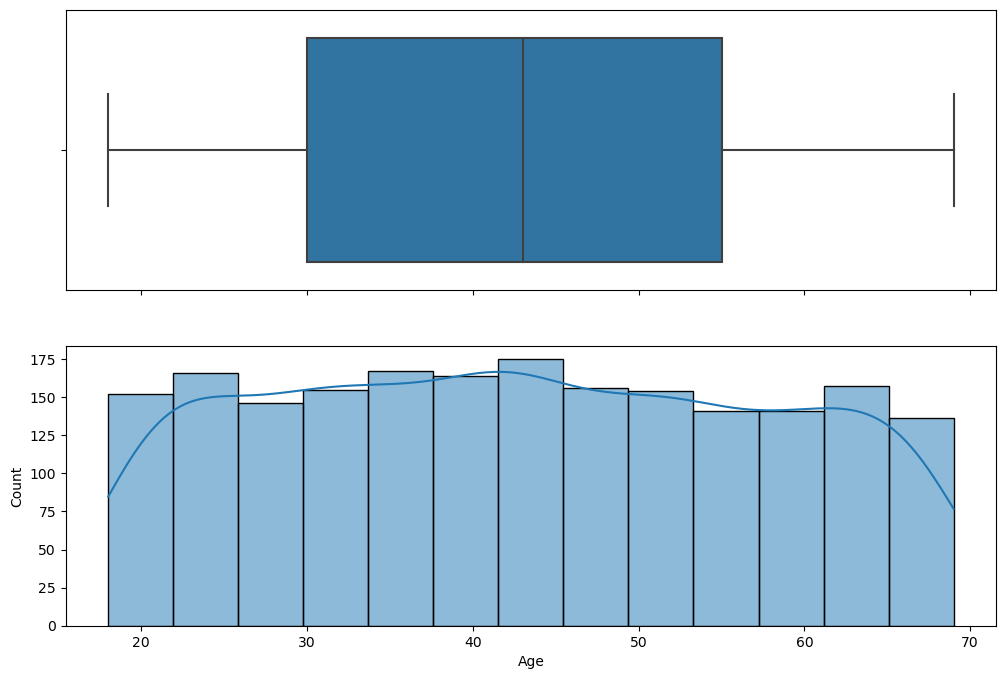

==================Age==================
{
   "count": 2010.0,
   "mean": 43.01044776119403,
   "std": 14.740002907489549,
   "min": 18.0,
   "25%": 30.0,
   "50%": 43.0,
   "75%": 55.0,
   "max": 69.0,
   "shapiro": 9.120994788956956e-24,
   "normal": "True",
   "missing": "0",
   "skew": 0.04477544203243504,
   "type": "slight right(positive)-skew"
}


In [125]:
describe_numerical_col(df, 'Age')

<H1>Bivariate

In [1]:
#Add functions for Bivariate analysis